# Import libraries:

In [1]:
import cv2
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import os

# Converting all images into the same size:

# Age 0-2:

In [50]:
def importPath(folder):
    path = f"images/{folder}/*.jpg"
    print(path)
    list_paths = glob.glob(path)
    return list_paths

In [46]:
list_paths = importPath('0_2')

In [47]:
for i,e in enumerate(list_paths):
    imge = cv2.imread(e, cv2.IMREAD_UNCHANGED)
    resized = cv2.resize(imge, (60,60))
    path = "treated_images/0_2_t"
    cv2.imwrite(os.path.join(path , f'image_{i}.jpg'), resized)
print('All images were resized and saved into the new folder')

All images were resized and saved into the new folder


# Age 4-6:

In [31]:
list_paths = importPath('4_6')

In [33]:
for i,e in enumerate(list_paths):
    imge = cv2.imread(e, cv2.IMREAD_UNCHANGED)
    resized = cv2.resize(imge, (60,60))
    path = "treated_images/4_6_t"
    cv2.imwrite(os.path.join(path , f'image_{i}.jpg'), resized)
print('All images were resized and saved into the new folder')

All images were resized and saved into the new folder


# Age 8-12:

In [34]:
list_paths = importPath('8_12')

In [35]:
for i,e in enumerate(list_paths):
    imge = cv2.imread(e, cv2.IMREAD_UNCHANGED)
    resized = cv2.resize(imge, (60,60))
    path = "treated_images/8_12_t"
    cv2.imwrite(os.path.join(path , f'image_{i}.jpg'), resized)
print('All images were resized and saved into the new folder')

All images were resized and saved into the new folder


# Age 15-20:

In [36]:
list_paths = importPath('15_20')

In [37]:
for i,e in enumerate(list_paths):
    imge = cv2.imread(e, cv2.IMREAD_UNCHANGED)
    resized = cv2.resize(imge, (60,60))
    path = "treated_images/15_20_t"
    cv2.imwrite(os.path.join(path , f'image_{i}.jpg'), resized)
print('All images were resized and saved into the new folder')

All images were resized and saved into the new folder


# Age 25-32:

In [38]:
list_paths = importPath('25_32')

In [39]:
for i,e in enumerate(list_paths):
    imge = cv2.imread(e, cv2.IMREAD_UNCHANGED)
    resized = cv2.resize(imge, (60,60))
    path = "treated_images/25_32_t"
    cv2.imwrite(os.path.join(path , f'image_{i}.jpg'), resized)
print('All images were resized and saved into the new folder')

All images were resized and saved into the new folder


# Age 38-43:

In [40]:
list_paths = importPath('38_43')

In [41]:
for i,e in enumerate(list_paths):
    imge = cv2.imread(e, cv2.IMREAD_UNCHANGED)
    resized = cv2.resize(imge, (60,60))
    path = "treated_images/38_43_t"
    cv2.imwrite(os.path.join(path , f'image_{i}.jpg'), resized)
print('All images were resized and saved into the new folder')

All images were resized and saved into the new folder


# Age 48-53:

In [42]:
list_paths = importPath('48_53')

In [43]:
for i,e in enumerate(list_paths):
    imge = cv2.imread(e, cv2.IMREAD_UNCHANGED)
    resized = cv2.resize(imge, (60,60))
    path = "treated_images/48_53_t"
    cv2.imwrite(os.path.join(path , f'image_{i}.jpg'), resized)
print('All images were resized and saved into the new folder')

All images were resized and saved into the new folder


# Age 60-100:

In [44]:
list_paths = importPath('60_100')

In [45]:
for i,e in enumerate(list_paths):
    imge = cv2.imread(e, cv2.IMREAD_UNCHANGED)
    resized = cv2.resize(imge, (60,60))
    path = "treated_images/60_100_t"
    cv2.imwrite(os.path.join(path , f'image_{i}.jpg'), resized)
print('All images were resized and saved into the new folder')

All images were resized and saved into the new folder


# Testing the results

In [2]:
def importNewPath(folder):
    path = f"treated_images/{folder}/*.jpg"
    print(path)
    faceFiles = glob.glob(path)
    return faceFiles 

In [3]:
folders = ['0_2_t', '4_6_t', '8_12_t', '15_20_t', '25_32_t', '38_43_t', '48_53_t', '60_100_t']

faceFiles = []
    
for files in folders:
    ff = importNewPath(files)
    faceFiles.append(ff)

treated_images/0_2_t/*.jpg
treated_images/4_6_t/*.jpg
treated_images/8_12_t/*.jpg
treated_images/15_20_t/*.jpg
treated_images/25_32_t/*.jpg
treated_images/38_43_t/*.jpg
treated_images/48_53_t/*.jpg
treated_images/60_100_t/*.jpg


In [4]:
pics = dict()
for ffiles in faceFiles:
    for foto in ffiles:
        label = foto.split("/")[-2]
        pic = foto
        if label in pics:
            pics[label].append(pic)
        else:
            pics[label] = [pic]

In [5]:
im = []

for k,v in pics.items():
    for a in v:
        im.append([k,a])
faces_df =  pd.DataFrame(im, columns=["label","foto"])

display(faces_df.head())

,label,foto
0,0_2_t,treated_images/0_2_t/image_669.jpg
1,0_2_t,treated_images/0_2_t/image_1570.jpg
2,0_2_t,treated_images/0_2_t/image_346.jpg
3,0_2_t,treated_images/0_2_t/image_441.jpg
4,0_2_t,treated_images/0_2_t/image_1055.jpg


In [6]:
faces_df.label.value_counts()

25_32_t     5023
0_2_t       2491
38_43_t     2340
4_6_t       2140
8_12_t      2124
15_20_t     1642
60_100_t     872
48_53_t      830
Name: label, dtype: int64

In [7]:
Age0_2 = pics['0_2_t']
Age0_2[0]

'treated_images/0_2_t/image_669.jpg'

## Create function to recognize faces in images:

In [8]:
%matplotlib inline

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


def extractFace(picFile, debug=False):
    im = cv2.imread(picFile)    
    im_bw = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(im_bw, 2, 4)
    if len(faces) == 0:
        print(f"Warning: no face detected on {picFile}")
        return 
    if debug:
        print(faces)
    selected_face = faces[0]
    discard_faces = faces[1:]
    if debug:
        for (x,y,w,h) in faces:
            im = cv2.rectangle(im,(x,y),(x+w,y+h),(255,0,0),2)
            cara = im_bw[y:y+h, x:x+w]
            roi_color = im[y:y+h, x:x+w]
        plt.imshow(im)
    return cara

[[ 9  4 48 48]]


array([[  2,   1,   4, ...,   2,   1,   1],
       [ 19,  83,  84, ...,   0,   1,   1],
       [ 80,  74,  83, ...,   0,   5,   1],
       ...,
       [113, 104, 103, ...,  98, 105, 111],
       [100,  91, 111, ...,  91,  98, 100],
       [ 91, 105, 111, ...,  66,  87,  96]], dtype=uint8)

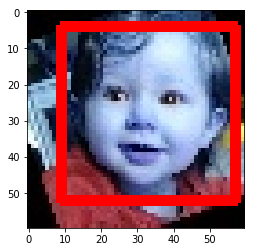

In [9]:
extractFace(Age0_2[8], debug=True)

## Apply in all images:

In [10]:
def printMyFace(facesImages, label):
    plt.figure(figsize=(20,5))
    for i,a in enumerate(facesImages):
        plt.subplot(1,len(facesImages), i + 1)
        plt.imshow(a, cmap="gray")
        plt.title(f"Face of {label}")

In [11]:
def processFiles(files, dim=(60,60)):
    output_faces = []
    for incomingFile in files: 
        face = extractFace(incomingFile, debug=True)
        if  isinstance(face, np.ndarray):
            face = cv2.resize(face, dim)
            output_faces.append(face)
    return output_faces

[[ 9  4 48 48]]
[[ 7  3 48 48]]
[[ 6  7 48 48]]
[[ 8  7 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 7  8 48 48]]
[[ 7  5 48 48]]
[[ 6  8 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 6  7 48 48]]
[[ 7  3 48 48]]
[[ 6  6 48 48]]
[[10  2 48 48]]
[[ 7  5 48 48]]
[[ 4  4 48 48]]
[[ 8  5 48 48]]
[[ 6  6 48 48]]
[[ 9  3 48 48]]
[[ 6  7 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 4  4 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 5  4 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 3  4 48 48]]
[[ 7  5 48 48]]
[[ 5  2 48 48]]
[[ 5  5 48 48]]
[[ 8  3 48 48]]
[[10  5 48 48]]
[[ 7  3 48 48]]
[[ 6  3 48 48]]
[[ 8  4 48 48]]
[[ 8  6 48 48]]
[[ 8  3 48 48]]
[[ 8  4 48 48]]
[[ 8  2 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 8  3 48 48]]
[[ 8  7 48 48]]
[[ 6  5 48 48]]
[[11  4 48 48]]
[[ 9  3 48 48]]
[[ 6  4 48 48]]


[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[11  4 48 48]]
[[ 8  5 48 48]]
[[ 5  7 48 48]]
[[ 6  6 48 48]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 9  3 48 48]]
[[ 7  3 48 48]]
[[ 6  4 48 48]]
[[ 8  3 48 48]]
[[ 4  3 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 8  3 48 48]]
[[ 4  6 48 48]]
[[ 7  5 48 48]]
[[11  4 48 48]]
[[ 6  5 48 48]]
[[ 4  6 48 48]]
[[ 5  4 48 48]]
[[ 8  3 48 48]]
[[ 5  4 48 48]]
[[ 6  4 48 48]]
[[ 4  3 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 5  3 48 48]]
[[ 9  3 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 8  4 48 48]]
[[ 7  4 48 48]]
[[ 8  4 48 48]]
[[ 4  5 48 48]]
[[ 6  4 48 48]]
[[ 3  5 48 48]]
[[ 5  6 48 48]]
[[ 3  5 48 48]]
[[ 5  3 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 7  6 48 48]]


[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 4  4 48 48]]
[[ 7  4 48 48]]
[[ 5  6 48 48]]
[[11  4 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 5  9 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 4  5 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 4  5 48 48]]
[[ 6  7 48 48]]
[[ 6  4 48 48]]
[[ 3 11 48 48]]
[[ 5  4 48 48]]
[[ 8  5 48 48]]
[[ 8  4 48 48]]
[[ 7  4 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 4  3 48 48]]
[[ 2  4 48 48]]
[[ 4 10 48 48]]
[[ 8  4 48 48]]
[[ 7  6 48 48]]
[[ 7  2 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 8  7 48 48]]
[[ 9  4 48 48]]
[[ 8  4 48 48]]
[[ 2  4 48 48]]
[[ 6  4 48 48]]
[[ 5  3 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]
[[ 6  6 48 48]]
[[ 2  8 48 48]]
[[ 4  3 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 6  1 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 9  6 48 48]]


[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 9  2 48 48]]
[[11 10 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  3 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[ 6  7 48 48]]
[[ 5  3 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 4  3 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 9  4 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  3 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 4  6 48 48]]
[[ 6  4 48 48]]
[[ 4  4 48 48]]
[[ 5  5 48 48]]
[[18 17 24 24]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 4  2 48 48]]
[[ 8  3 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 9  3 48 48]]
[[ 6  6 48 48]]
[[ 8  5 48 48]]
[[ 9  3 48 48]]
[[ 7  3 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 5  4 48 48]]
[[ 6  4 48 48]]
[[ 4  9 48 48]]
[[ 9  5 48 48]]
[[ 4  3 48 48]]
[[ 4  5 48 48]]


[[ 6  7 48 48]]
[[ 5  3 48 48]]
[[ 6  5 48 48]]
[[ 9  4 48 48]]
[[ 6  3 48 48]]
[[ 4  6 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 4  4 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 5  5 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 1  5 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 5  7 48 48]]
[[ 4  5 48 48]]
[[ 8  7 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 4  3 48 48]]
[[ 7  6 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 5  7 48 48]]
[[ 9  3 48 48]]
[[ 9  2 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 1  2 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 9  6 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 6  7 48 48]]
[[ 6  4 48 48]]
[[ 7  3 48 48]]
[[ 4  3 48 48]]
[[ 7  2 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[ 7  5 48 48]]
[[ 3  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 9  4 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 7  3 48 48]]
[[ 9  4 48 48]]
[[ 7  4 48 48]]
[[ 6  5 

[[ 6  9 48 48]]
[[ 7  4 48 48]]
[[ 8  3 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 1  2 48 48]]
[[ 7  7 48 48]]
[[ 7  6 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 9  3 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[ 7  5 48 48]]
[[ 6  8 48 48]]
[[ 5  5 48 48]]
[[ 6  3 48 48]]
[[ 6  3 48 48]]
[[ 8  5 48 48]]
[[ 6  7 48 48]]
[[ 4  5 48 48]]
[[ 5  3 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[10  3 48 48]]
[[ 5  4 48 48]]
[[ 6  6 48 48]]
[[ 7  3 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 3  5 48 48]]
[[ 6  3 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 9  6 48 48]]
[[ 8  5 48 48]]
[[ 8  5 48 48]]
[[ 2  4 48 48]]
[[ 7  4 48 48]]
[[ 8  5 48 48]]
[[ 4  4 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 4  4 48 48]]
[[10  4 48 48]]
[[ 2  4 48 48]]
[[ 5  5 48 48]]
[[ 6  7 48 48]]
[[ 3  6 48 48]]


[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 9  4 48 48]]
[[ 5  5 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 9  8 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 8  8 48 48]]
[[ 2 10 48 48]]
[[ 7  5 48 48]]
[[ 6  3 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[10  2 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6 11 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 7  2 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 7  4 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 7  4 48 48]]
[[ 8  5 48 48]]
[[ 7  6 48 48]]
[[ 9  8 48 48]]
[[ 9  4 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 5  4 48 48]]
[[ 1  5 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]


[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[10  3 48 48]]
[[ 8  4 48 48]]
[[ 8  3 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 9  4 48 48]]
[[ 9  4 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 8  5 48 48]]
[[ 5  3 48 48]]
[[ 8  4 48 48]]
[[ 8  5 48 48]]
[[ 1  2 48 48]]
[[ 8  4 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 9  4 48 48]]
[[ 5  4 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 8  7 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 7  4 48 48]]
[[ 5  5 48 48]]
[[ 7  4 48 48]]
[[ 5  4 48 48]]
[[ 9  5 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[10  7 48 48]]
[[ 6  1 48 48]]
[[ 5  2 48 48]]
[[ 5  3 48 48]]
[[ 5  6 48 48]]
[[ 5  6 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 8  1 48 48]]
[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]


[[ 9  9 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 8  3 48 48]]
[[ 4  4 48 48]]
[[ 5  5 48 48]]
[[ 7  8 48 48]]
[[ 6  5 48 48]]
[[ 3  3 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 4  5 48 48]]
[[ 4  3 48 48]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[ 8  5 48 48]]
[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 4  4 48 48]]
[[ 8  5 48 48]]
[[ 5  3 48 48]]
[[ 3  4 48 48]]
[[ 9  6 48 48]]
[[ 5  4 48 48]]
[[ 9  5 48 48]]
[[ 5  6 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 8  5 48 48]]
[[ 6  1 48 48]]
[[ 7  4 48 48]]
[[ 7  7 48 48]]
[[ 7  4 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 7  5 48 48]]
[[ 4  6 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 8  6 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 5  3 48 48]]
[[ 5  4 48 48]]
[[ 9  6 48 48]]
[[ 5  5 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 7 11 48 48]]
[[ 5  3 48 48]]
[[ 4  5 48 48]]
[[ 8  4 48 48]]
[[ 8  6 

[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[18 15 24 24]]
[[ 3  6 48 48]]
[[ 5  5 48 48]]
[[ 9  4 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 4  5 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 7  3 48 48]]
[[ 5  6 48 48]]
[[ 3  5 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 5  6 48 48]]
[[ 5  5 48 48]]
[[ 7  3 48 48]]
[[ 6  2 48 48]]
[[ 2  4 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 4  4 48 48]]
[[ 4  6 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 4  4 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 7  3 48 48]]
[[ 5  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]
[[18 17 24 24]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 5  4 48 48]]
[[ 3  5 48 48]]
[[ 8  4 48 48]]


[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 8  3 48 48]]
[[ 6  5 48 48]]
[[ 3  3 48 48]]
[[ 7  6 48 48]]
[[ 5  5 48 48]]
[[ 7  3 48 48]]
[[ 5  4 48 48]]
[[ 5  4 48 48]]
[[ 6  6 48 48]]
[[ 4  4 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 7  2 48 48]]
[[ 7  5 48 48]]
[[ 6  3 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 5  3 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 4  4 48 48]]
[[ 8  7 48 48]]
[[ 4  6 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 4  4 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[ 3  5 48 48]]
[[ 6  7 48 48]]
[[ 3  3 48 48]]
[[ 8  5 48 48]]
[[ 8  4 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[ 6  6 48 48]]
[[ 5 10 48 48]]
[[ 8  6 48 48]]
[[ 3  4 48 48]]
[[ 6  3 48 48]]
[[ 5  6 48 48]]
[[ 5  6 48 48]]
[[ 4  5 48 48]]
[[ 5  6 

[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 9  5 48 48]]
[[ 7  5 48 48]]
[[ 7  3 48 48]]
[[ 8  7 48 48]]
[[ 8  4 48 48]]
[[ 8  5 48 48]]
[[ 8  6 48 48]]
[[ 7  5 48 48]]
[[ 8  3 48 48]]
[[ 6  6 48 48]]
[[ 6  3 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[18 16 24 24]]
[[ 6  5 48 48]]
[[17 16 24 24]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 6  7 48 48]]
[[ 8  2 48 48]]
[[ 8  3 48 48]]
[[ 7  4 48 48]]
[[ 4  4 48 48]]
[[ 8  5 48 48]]
[[ 4  7 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 4  3 48 48]]
[[ 8  6 48 48]]
[[ 7  7 48 48]]
[[ 7  7 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 7  3 48 48]]
[[ 6  4 48 48]]
[[ 6  3 48 48]]


[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 7  8 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 7  3 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 8  3 48 48]]
[[ 6  5 48 48]]
[[ 5  7 48 48]]
[[ 4  4 48 48]]
[[ 5  3 48 48]]
[[ 8  6 48 48]]
[[ 6  8 48 48]]
[[ 6  2 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 8  6 48 48]]
[[ 9  3 48 48]]
[[ 6  3 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 9  7 48 48]]
[[ 8  4 48 48]]
[[ 7  7 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 9  4 48 48]]
[[ 5  5 48 48]]
[[ 5  4 48 48]]
[[ 5  4 48 48]]
[[ 4  3 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 7  3 48 48]]
[[ 6  7 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]


[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 4  5 48 48]]
[[10  4 48 48]]
[[ 5  6 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 7  7 48 48]]
[[ 6  6 48 48]]
[[ 4  5 48 48]]
[[ 7  8 48 48]]
[[ 4  3 48 48]]
[[ 7  4 48 48]]
[[ 7  9 48 48]]
[[ 6  5 48 48]]
[[ 9  5 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[10  4 48 48]]
[[ 4  5 48 48]]
[[18 17 24 24]]
[[ 6  5 48 48]]
[[ 8  3 48 48]]
[[ 9 10 48 48]]
[[ 7  5 48 48]]
[[ 6  3 48 48]]
[[ 5  2 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 3  6 48 48]]
[[ 7  3 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[10  3 48 48]]
[[ 8  5 48 48]]
[[ 1  3 48 48]]
[[18 17 24 24]]
[[ 6  7 48 48]]
[[ 8  8 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 6  3 48 48]]
[[ 6  5 48 48]]
[[ 8  8 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 6  7 48 48]]
[[ 6  4 48 48]]


[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 7 10 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 7  7 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 4  4 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 6  4 48 48]]
[[ 7  7 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 4  4 48 48]]
[[ 4  6 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 4  7 48 48]]
[[ 7  6 48 48]]
[[ 7  2 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 7  3 48 48]]
[[ 6  7 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 6  3 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 5  2 48 48]]
[[ 8  3 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 6  6 48 48]]
[[ 4  5 48 48]]
[[ 5  4 48 48]]


[[ 7  6 48 48]]
[[10  6 48 48]]
[[ 7  6 48 48]]
[[ 2  5 48 48]]
[[ 5  3 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 4  5 48 48]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 6  2 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 6  7 48 48]]
[[ 6  4 48 48]]
[[ 4  4 48 48]]
[[ 9  4 48 48]]
[[ 6  4 48 48]]
[[ 4  4 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 4  7 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 5  8 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 9  4 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[ 4  4 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 8  3 48 48]]
[[ 4  3 48 48]]
[[ 3  4 48 48]]
[[ 7  3 48 48]]
[[ 5  4 48 48]]


[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 7  2 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[ 4  3 48 48]]
[[ 2  5 48 48]]
[[ 7 10 48 48]]
[[10  4 48 48]]
[[ 8  5 48 48]]
[[ 5  4 48 48]]
[[ 8  7 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 4  7 48 48]]
[[ 7  6 48 48]]
[[ 7  7 48 48]]
[[ 6  5 48 48]]
[[ 4  6 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 6  8 48 48]]
[[ 7  4 48 48]]
[[ 4  6 48 48]]
[[ 4  5 48 48]]
[[ 4  4 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 2  2 48 48]]
[[ 5  4 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 9  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 7  8 48 48]]
[[ 5  6 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[18 17 24 24]]
[[ 8  4 48 48]]
[[ 7  3 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 4  3 48 48]]
[[ 6  4 48 48]]
[[ 4  5 48 48]]


[[ 6  6 48 48]]
[[ 7  4 48 48]]
[[20 15 24 24]]
[[ 5  4 48 48]]
[[ 7  3 48 48]]
[[ 7  7 48 48]]
[[ 6  6 48 48]]
[[ 3  2 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 6  6 48 48]]
[[ 8  6 48 48]]
[[ 8  5 48 48]]
[[ 3  4 48 48]]
[[ 8  5 48 48]]
[[ 6  3 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 9  6 48 48]]
[[ 8  4 48 48]]
[[ 7  7 48 48]]
[[ 8  1 48 48]]
[[ 7  5 48 48]]
[[ 5  7 48 48]]
[[ 6  3 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[11  4 48 48]]
[[ 5  3 48 48]]
[[ 4  8 48 48]]
[[ 6  4 48 48]]
[[ 7  3 48 48]]
[[10  5 48 48]]
[[ 7  7 48 48]]
[[ 5  6 48 48]]
[[ 4  5 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 7  7 48 48]]
[[ 8  6 48 48]]
[[ 5  4 48 48]]
[[ 8  5 48 48]]
[[ 2  4 48 48]]
[[ 8  4 48 48]]
[[ 4  6 48 48]]
[[ 5  5 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 7  6 48 48]]


[[ 7  6 48 48]]
[[ 5  5 48 48]]
[[ 8  5 48 48]]
[[ 8  5 48 48]]
[[ 5  4 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 4  4 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 5  4 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 9  4 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 8  3 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 2  4 48 48]]
[[ 5  5 48 48]]
[[ 9  5 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 9  3 48 48]]
[[ 6  3 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[ 7  4 48 48]]
[[ 5  6 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 9  2 48 48]]
[[ 5  4 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 6  7 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 1  2 48 48]]


[[ 6  7 48 48]]
[[ 2  1 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 5  7 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[19 18 24 24]]
[[ 7  4 48 48]]
[[ 8  5 48 48]]
[[ 5  6 48 48]]
[[ 5  4 48 48]]
[[ 4  3 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 8  4 48 48]]
[[ 8  4 48 48]]
[[ 8  6 48 48]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 8  4 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 4  6 48 48]]
[[ 7  4 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 4  5 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 4  4 48 48]]
[[ 5  6 48 48]]
[[ 5  4 48 48]]
[[ 3  5 48 48]]
[[ 4  7 48 48]]
[[ 3  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 9  5 48 48]]
[[ 6  3 48 48]]
[[ 7  4 48 48]]
[[ 6  7 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]


[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[18 17 24 24]]
[[10  5 48 48]]
[[ 5  4 48 48]]
[[ 8  5 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 2  7 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 8  5 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 8  4 48 48]]
[[ 8  5 48 48]]
[[ 4  5 48 48]]
[[ 8  4 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 4  5 48 48]]
[[ 4  5 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 9  4 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[ 5  4 48 48]]
[[ 5  9 48 48]]
[[ 6  7 48 48]]
[[ 4  5 48 48]]
[[ 3  4 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 8  6 48 48]]
[[ 5  6 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 5  5 48 48]]
[[ 4  3 48 48]]
[[ 5  8 48 48]]
[[ 6  6 48 48]]
[[ 5  6 48 48]]


[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 6  3 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  3 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 6  7 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 8  6 48 48]]
[[11  5 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 7  7 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 5  6 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]
[[ 8  3 48 48]]
[[ 5  4 48 48]]
[[ 8  9 48 48]]
[[ 7  5 48 48]]
[[ 6  7 48 48]]
[[ 7  5 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 5  4 48 48]]
[[ 8  4 48 48]]
[[ 5  5 48 48]]
[[ 8  4 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 6  2 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]


[[ 5  5 48 48]]
[[ 4  5 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 4  5 48 48]]
[[ 4  4 48 48]]
[[ 5  5 48 48]]
[[ 4  4 48 48]]
[[ 8  5 48 48]]
[[ 4  5 48 48]]
[[ 7  4 48 48]]
[[ 5  4 48 48]]
[[ 8  4 48 48]]
[[ 4  3 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 5  3 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 7  6 48 48]]
[[18 17 24 24]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[ 8  6 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 4  3 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 7  3 48 48]]
[[ 7  4 48 48]]
[[ 5  3 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 4  4 48 48]]
[[ 8  6 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[18 15 24 24]]
[[ 5  4 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]


[[ 7  5 48 48]]
[[ 7  7 48 48]]
[[ 6  4 48 48]]
[[ 9  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 8  3 48 48]]
[[ 6  4 48 48]]
[[ 8  6 48 48]]
[[ 4  3 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 5  7 48 48]]
[[ 6  3 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 9  5 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 7  4 48 48]]
[[ 5  6 48 48]]
[[ 7  7 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 8  6 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[10  6 48 48]]
[[ 7  3 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  7 

[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 5  7 48 48]]
[[ 5  4 48 48]]
[[ 8  4 48 48]]
[[ 3  5 48 48]]
[[ 8  5 48 48]]
[[ 6  7 48 48]]
[[ 8  5 48 48]]
[[10  5 48 48]]
[[ 4  3 48 48]]
[[ 6  6 48 48]]
[[ 8  5 48 48]]
[[ 9  6 48 48]]
[[ 6  5 48 48]]
[[ 6  8 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[ 4  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 8  7 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 7  7 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 4  4 48 48]]
[[ 8  6 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 8  5 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]
[[ 7  5 48 48]]


[[ 7  5 48 48]]
[[ 2  5 48 48]]
[[ 6  3 48 48]]
[[ 5  5 48 48]]
[[ 4  3 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 5  8 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 7  7 48 48]]
[[ 5 10 48 48]]
[[ 5  5 48 48]]
[[ 8  5 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 5  6 48 48]]
[[ 4  4 48 48]]
[[ 7  3 48 48]]
[[ 7  4 48 48]]
[[ 8  5 48 48]]
[[ 8  6 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 5  4 48 48]]
[[ 5  4 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[10  4 48 48]]
[[ 7  4 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 5  4 48 48]]
[[ 4  4 48 48]]
[[ 7  3 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 4  3 48 48]]
[[ 6  4 48 48]]
[[ 4  4 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 6  4 

[[ 4  8 48 48]]
[[ 4  5 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 9  4 48 48]]
[[ 4  4 48 48]]
[[ 4  9 48 48]]
[[ 7  4 48 48]]
[[ 8  4 48 48]]
[[ 7  6 48 48]]
[[ 6  3 48 48]]
[[ 6  6 48 48]]
[[ 9  5 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]
[[ 6  7 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 3  4 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 5  2 48 48]]
[[ 5  4 48 48]]
[[ 7  6 48 48]]
[[ 9  5 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 4 10 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 8  6 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 9  6 48 48]]
[[ 6  6 48 48]]
[[ 5  7 48 48]]
[[ 8  5 

[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 6  3 48 48]]
[[ 7  5 48 48]]
[[ 9  6 48 48]]
[[11  5 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[ 6  3 48 48]]
[[ 1  8 48 48]]
[[ 5  4 48 48]]
[[ 4  4 48 48]]
[[11  5 48 48]]
[[ 5  5 48 48]]
[[ 7  4 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 4  4 48 48]]
[[ 7  4 48 48]]
[[ 4  6 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 8  6 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[10  2 48 48]]
[[ 6  4 48 48]]
[[ 3  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 6  3 48 48]]
[[ 8  4 48 48]]
[[ 8  6 48 48]]
[[ 4  4 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 4  5 48 48]]
[[ 9  5 48 48]]
[[ 5  4 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 8  4 48 48]]
[[ 8  5 48 48]]
[[ 1  2 48 48]]
[[ 6  4 48 48]]


[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 7  5 48 48]]
[[ 6  7 48 48]]
[[ 9  5 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 7  4 48 48]]
[[10  5 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 6  3 48 48]]
[[ 7  5 48 48]]
[[ 7  3 48 48]]
[[ 8  5 48 48]]
[[ 5  4 48 48]]
[[ 9  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 3  5 48 48]]
[[ 3  4 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 8  5 48 48]]
[[ 8  4 48 48]]
[[ 5  3 48 48]]
[[ 7  4 48 48]]
[[19 18 24 24]]
[[ 7  6 48 48]]
[[ 3  5 48 48]]
[[ 8  6 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 9  5 48 48]]
[[10  4 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 4  5 48 48]]


[[ 6  7 48 48]]
[[ 8  4 48 48]]
[[ 8  7 48 48]]
[[ 5  4 48 48]]
[[ 7  7 48 48]]
[[ 6  5 48 48]]
[[ 9  4 48 48]]
[[ 5  5 48 48]]
[[ 5  7 48 48]]
[[ 5  5 48 48]]
[[ 8  4 48 48]]
[[ 9  4 48 48]]
[[ 6  7 48 48]]
[[ 4  4 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[17 18 24 24]]
[[ 8  6 48 48]]
[[18 17 24 24]]
[[ 7  7 48 48]]
[[ 7  4 48 48]]
[[ 4  6 48 48]]
[[ 5  4 48 48]]
[[ 1  6 48 48]]
[[ 7  2 48 48]]
[[ 5  4 48 48]]
[[ 6  2 48 48]]
[[ 2  3 48 48]]
[[10  3 48 48]]
[[ 6  3 48 48]]
[[ 6  3 48 48]]
[[ 6  3 48 48]]
[[ 7  6 48 48]]
[[ 4  5 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 4  6 48 48]]
[[ 6  2 48 48]]
[[ 8  5 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[17 16 24 24]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 4  8 48 48]]


[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 6  3 48 48]]
[[ 4  5 48 48]]
[[ 5  4 48 48]]
[[10  6 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 9  5 48 48]]
[[ 6  2 48 48]]
[[ 6  4 48 48]]
[[ 5  3 48 48]]
[[ 7  6 48 48]]
[[ 9 11 48 48]]
[[ 8  4 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 5  6 48 48]]
[[ 6  4 48 48]]
[[ 0  5 48 48]]
[[ 7  5 48 48]]
[[ 3  4 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 9  4 48 48]]
[[ 5  6 48 48]]
[[ 4  3 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 7  4 48 48]]
[[18 16 24 24]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 4  6 48 48]]
[[ 6  5 48 48]]
[[17 17 24 24]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 8  3 48 48]]
[[ 7  4 48 48]]
[[ 8  4 48 48]]
[[ 8  8 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 2  1 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]


[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 1  2 48 48]]
[[ 3  7 48 48]]
[[ 4  6 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 7  7 48 48]]
[[ 6  5 48 48]]
[[ 4  2 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[17 16 24 24]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[ 4  5 48 48]]
[[ 5  7 48 48]]
[[ 4  5 48 48]]
[[ 9  4 48 48]]
[[ 7  8 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 3  4 48 48]]
[[ 7  4 48 48]]
[[ 5  3 48 48]]
[[ 8  6 48 48]]
[[ 5  6 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 6  2 48 48]]


[[ 6  6 48 48]]
[[16 17 24 24]]
[[ 9  4 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[ 9  4 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 8  6 48 48]]
[[ 7  8 48 48]]
[[ 6  4 48 48]]
[[ 4  5 48 48]]
[[ 5  5 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 5  5 48 48]]
[[ 8  6 48 48]]
[[ 8  5 48 48]]
[[ 4  5 48 48]]
[[ 8  7 48 48]]
[[ 4  9 48 48]]
[[ 9  3 48 48]]
[[ 8  5 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 6  3 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 5  3 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 9  5 48 48]]
[[ 2  5 48 48]]
[[18 17 24 24]]
[[ 2  6 48 48]]
[[ 7  6 48 48]]
[[ 9  4 48 48]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]


[[ 5  5 48 48]]
[[ 5  5 48 48]]
[[ 8  6 48 48]]
[[ 5  5 48 48]]
[[ 3  3 48 48]]
[[10  5 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 9  5 48 48]]
[[ 5  7 48 48]]
[[ 6  7 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]
[[ 9  4 48 48]]
[[ 8  2 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 2  2 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[11  5 48 48]]
[[ 4  6 48 48]]
[[ 6  3 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 3  2 48 48]]
[[ 7  6 48 48]]
[[18 17 24 24]]
[[ 8  4 48 48]]
[[ 7  4 48 48]]
[[ 5  7 48 48]]
[[ 7  5 48 48]]
[[ 7  8 48 48]]
[[ 9  4 48 48]]
[[ 6  4 48 48]]
[[10  6 48 48]]
[[ 7  5 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]


[[ 5  2 48 48]]
[[ 8  6 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[20 15 24 24]]
[[ 8  6 48 48]]
[[ 2  7 48 48]]
[[ 7  3 48 48]]
[[ 5  4 48 48]]
[[ 4  2 48 48]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[18 17 24 24]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 5  2 48 48]]
[[ 3  2 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 9  5 48 48]]
[[ 4  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 9  5 48 48]]
[[ 8  4 48 48]]
[[10  5 48 48]]
[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 4  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]
[[ 5  4 48 48]]
[[ 8  3 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 8  5 48 48]]
[[18 17 24 24]]
[[ 4  4 48 48]]


[[ 6  6 48 48]]
[[ 2  4 48 48]]
[[ 5  4 48 48]]
[[ 4  4 48 48]]
[[ 4  4 48 48]]
[[ 9  6 48 48]]
[[ 5  5 48 48]]
[[ 5  4 48 48]]
[[ 8  4 48 48]]
[[ 5  4 48 48]]
[[ 9  6 48 48]]
[[ 8  5 48 48]]
[[ 2  6 48 48]]
[[ 3  2 48 48]]
[[ 9  5 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 6  4 48 48]]
[[ 2  2 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 7  7 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]
[[ 8  5 48 48]]
[[ 8  6 48 48]]
[[ 9  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 9  6 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 6  7 48 48]]
[[ 5  6 48 48]]
[[ 8  6 48 48]]


[[ 8  4 48 48]]
[[19 16 24 24]]
[[17 18 24 24]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 9  4 48 48]]
[[ 8  5 48 48]]
[[10  3 48 48]]
[[ 4  5 48 48]]
[[ 7  5 48 48]]
[[10  7 48 48]]
[[ 9  6 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 7 10 48 48]]
[[ 9  6 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 5  5 48 48]]
[[18 18 24 24]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 9  7 48 48]]
[[ 6  7 48 48]]
[[ 8  4 48 48]]
[[ 9  4 48 48]]
[[ 3  6 48 48]]
[[ 5  4 48 48]]
[[ 6  3 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 7  3 48 48]]
[[ 7  6 48 48]]
[[ 7  6 48 48]]
[[ 4  6 48 48]]
[[ 6  6 48 48]]
[[ 5  3 48 48]]
[[ 4  5 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]


[[20 18 24 24]]
[[ 7  3 48 48]]
[[ 4  8 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 8  6 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[ 7  7 48 48]]
[[ 6  6 48 48]]
[[ 6  7 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 4  6 48 48]]
[[ 6  7 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 5  7 48 48]]
[[ 8  5 48 48]]
[[ 5  6 48 48]]
[[ 5  4 48 48]]
[[ 6  7 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 4  4 48 48]]
[[ 4  5 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 9  5 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 6  4 48 48]]
[[ 6  7 48 48]]
[[ 7  6 48 48]]
[[ 8  6 48 48]]
[[ 7  6 48 48]]
[[ 8  5 48 48]]
[[ 6  8 48 48]]
[[ 5  9 48 48]]
[[ 4  8 48 48]]
[[ 7  4 48 48]]
[[ 8  6 48 48]]
[[ 5  4 48 48]]
[[18 16 24 24]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 9  5 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]


[[ 4  6 48 48]]
[[ 7  6 48 48]]
[[ 6  3 48 48]]
[[ 6  7 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 8  6 48 48]]
[[ 8  4 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 4  6 48 48]]
[[ 7  8 48 48]]
[[ 3  5 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 1  4 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 4  6 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[ 6  3 48 48]]
[[18 17 24 24]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 6  3 48 48]]
[[ 6  4 48 48]]
[[ 4  5 48 48]]
[[ 6  6 48 48]]
[[ 4  4 48 48]]
[[ 6  6 48 48]]
[[ 8  6 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 7  4 48 48]]
[[ 8  5 48 48]]
[[ 4  5 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 7  4 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 7  8 48 48]]
[[ 5  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 4  5 

[[ 6  5 48 48]]
[[ 5  7 48 48]]
[[ 8  5 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 8  5 48 48]]
[[ 4  8 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 4  5 48 48]]
[[ 8  7 48 48]]
[[ 7  5 48 48]]
[[ 7  8 48 48]]
[[ 8  4 48 48]]
[[ 5  8 48 48]]
[[ 4  3 48 48]]
[[ 9  6 48 48]]
[[ 5  5 48 48]]
[[ 4  5 48 48]]
[[ 8  4 48 48]]
[[10  6 48 48]]
[[ 4  9 48 48]]
[[ 5  4 48 48]]
[[ 7  6 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[20 14 24 24]]
[[ 7  4 48 48]]
[[ 5  4 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 8  9 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 9  5 48 48]]
[[ 4  6 48 48]]
[[18 18 24 24]]
[[ 5  3 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]


[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[11  5 48 48]]
[[ 8  5 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 8  3 48 48]]
[[ 8  6 48 48]]
[[ 5  6 48 48]]
[[ 4  6 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 5  7 48 48]]
[[ 7  9 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[ 6  6 48 48]]
[[ 6  7 48 48]]
[[ 5  6 48 48]]
[[ 8  5 48 48]]
[[ 8  7 48 48]]
[[ 5  5 48 48]]
[[ 7  4 48 48]]
[[ 8  7 48 48]]
[[ 8  4 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 7  3 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 8  5 48 48]]
[[ 8  4 48 48]]
[[ 7  4 48 48]]
[[ 9  3 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 8  5 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 7  0 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 6  7 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 8  7 48 48]]
[[ 8  5 48 48]]


[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 5  3 48 48]]
[[ 6  7 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 9  4 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 4  6 48 48]]
[[ 7  5 48 48]]
[[ 9  4 48 48]]
[[ 9  5 48 48]]
[[ 5  8 48 48]]
[[ 5  6 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 6  3 48 48]]
[[ 9  8 48 48]]
[[ 7  4 48 48]]
[[ 8  7 48 48]]
[[ 3  6 48 48]]
[[ 4  5 48 48]]
[[ 7  6 48 48]]
[[ 4  7 48 48]]
[[ 6  7 48 48]]
[[ 2  1 48 48]]
[[ 9  6 48 48]]
[[ 8  5 48 48]]
[[ 4  6 48 48]]
[[ 6  8 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 5  7 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 6  7 48 48]]
[[ 5  6 48 48]]
[[ 7  7 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 6  7 48 48]]
[[ 6  7 48 48]]
[[10  2 48 48]]
[[ 6  2 48 48]]
[[ 4  5 48 48]]
[[11  4 48 48]]


[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 8  5 48 48]]
[[ 6  6 48 48]]
[[ 9  6 48 48]]
[[ 8  4 48 48]]
[[10  9 48 48]]
[[ 4  7 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 6 11 48 48]]
[[ 8  4 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 5  7 48 48]]
[[ 5  6 48 48]]
[[ 7  4 48 48]]
[[ 8  7 48 48]]
[[ 6  7 48 48]]
[[ 5  4 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 2  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 8  4 48 48]]
[[ 5  3 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 7  7 48 48]]
[[ 5  6 48 48]]
[[ 5  5 48 48]]
[[ 4  5 48 48]]
[[ 9  6 48 48]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[ 6  6 48 48]]
[[ 4  5 48 48]]
[[ 8  7 48 48]]
[[ 9  5 48 48]]
[[ 6  7 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 7  1 48 48]]
[[ 4  5 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[18 18 24 24]]
[[ 6  7 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 7  6 

[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 4  6 48 48]]
[[ 7  8 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[ 7  5 48 48]]
[[ 8  6 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 5  8 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 9  5 48 48]]
[[ 5  5 48 48]]
[[ 5  4 48 48]]
[[ 7  6 48 48]]
[[ 8  5 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 3  5 48 48]]
[[ 6  4 48 48]]
[[ 4  3 48 48]]
[[ 6  7 48 48]]
[[ 7  8 48 48]]
[[ 5  9 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[ 9  5 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 4  6 48 48]]
[[ 6  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[ 8  9 48 48]]


[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 9  5 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[10  1 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]
[[ 6  7 48 48]]
[[ 2  4 48 48]]
[[ 8  4 48 48]]
[[ 8  7 48 48]]
[[ 4  4 48 48]]
[[ 4  6 48 48]]
[[ 7  6 48 48]]
[[ 9  6 48 48]]
[[ 6  5 48 48]]
[[ 5  7 48 48]]
[[ 8  5 48 48]]
[[ 8  4 48 48]]
[[ 3  3 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 3  4 48 48]]
[[ 4  4 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 5  5 48 48]]
[[ 8  5 48 48]]
[[ 6  6 48 48]]
[[ 6  7 48 48]]
[[ 8  5 48 48]]
[[ 5  6 48 48]]
[[ 8  4 48 48]]
[[ 8  4 48 48]]
[[ 7  6 48 48]]
[[ 9  5 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 7  8 48 48]]
[[ 7  8 48 48]]
[[ 5  6 48 48]]
[[ 9  6 48 48]]
[[ 7  8 48 48]]
[[ 2  4 48 48]]


[[ 7  6 48 48]]
[[ 8  6 48 48]]
[[ 9  6 48 48]]
[[ 9  3 48 48]]
[[ 8  7 48 48]]
[[ 3  4 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[11  6 48 48]]
[[ 4  5 48 48]]
[[ 4  5 48 48]]
[[ 8  7 48 48]]
[[ 5  4 48 48]]
[[ 9  4 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 3  8 48 48]]
[[ 4  6 48 48]]
[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[ 6 10 48 48]]
[[ 7  8 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 9  6 48 48]]
[[ 9  5 48 48]]
[[ 6  4 48 48]]
[[ 6  8 48 48]]
[[ 7  6 48 48]]
[[ 1  6 48 48]]
[[ 7  6 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 4  5 48 48]]
[[ 6  8 48 48]]
[[ 6  5 48 48]]
[[ 7  7 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 6  7 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 4  3 48 48]]
[[ 9  5 48 48]]
[[ 6  7 48 48]]


[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 4  6 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 8  4 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 8  6 48 48]]
[[ 4  3 48 48]]
[[ 6  7 48 48]]
[[ 1  4 48 48]]
[[ 6  7 48 48]]
[[ 8  5 48 48]]
[[ 6  6 48 48]]
[[ 4  5 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 8  7 48 48]]
[[ 8  6 48 48]]
[[ 7  4 48 48]]
[[20 18 24 24]]
[[ 6  4 48 48]]
[[ 7  3 48 48]]
[[17 16 24 24]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 7  4 48 48]]
[[ 6  7 48 48]]
[[ 6  6 48 48]]
[[ 4  5 48 48]]
[[ 3  5 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 7  4 48 48]]
[[ 4  5 48 48]]
[[ 7  6 48 48]]
[[ 9  6 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 7  7 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[10  6 48 48]]
[[ 7  5 48 48]]
[[ 9  6 48 48]]
[[ 6  5 48 48]]
[[ 4  7 48 48]]


[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 6  7 48 48]]
[[ 4  1 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[19 18 24 24]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 8  7 48 48]]
[[10  5 48 48]]
[[ 8  6 48 48]]
[[ 8  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 7  6 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 5  7 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 4  5 48 48]]
[[ 8  6 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[16 15 24 24]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 7  7 48 48]]


[[ 4  7 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 9  4 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 6  7 48 48]]
[[ 4  5 48 48]]
[[ 8  8 48 48]]
[[ 6  5 48 48]]
[[ 6  3 48 48]]
[[ 4  5 48 48]]
[[ 6  4 48 48]]
[[ 9  4 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 8  8 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 4  9 48 48]]
[[ 8  4 48 48]]
[[ 4  7 48 48]]
[[18 17 24 24]]
[[ 9  5 48 48]]
[[ 4  5 48 48]]
[[ 6  6 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 8  2 48 48]]
[[ 5  5 48 48]]
[[ 4  4 48 48]]
[[ 6  6 48 48]]
[[ 7  7 48 48]]
[[ 6  7 48 48]]
[[ 8  6 48 48]]
[[ 7  6 48 48]]
[[ 8  6 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 6  7 48 48]]
[[ 8  4 48 48]]
[[ 2  5 48 48]]
[[ 6  6 48 48]]
[[ 7  3 48 48]]
[[ 8  6 48 48]]
[[ 6  4 48 48]]


[[ 5  7 48 48]]
[[ 8  6 48 48]]
[[ 7  7 48 48]]
[[ 4  7 48 48]]
[[ 6  6 48 48]]
[[ 7  8 48 48]]
[[ 8  5 48 48]]
[[ 9  6 48 48]]
[[ 7  4 48 48]]
[[ 9  5 48 48]]
[[ 5  5 48 48]]
[[ 9  3 48 48]]
[[ 4  5 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 8  2 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 4  2 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 4  4 48 48]]
[[ 6  6 48 48]]
[[ 8  6 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 4  5 48 48]]
[[ 6  8 48 48]]
[[10  3 48 48]]
[[ 6  5 48 48]]
[[ 7  7 48 48]]
[[ 1  2 48 48]]
[[ 7  5 48 48]]
[[ 8  3 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 9  5 48 48]]
[[ 8  7 48 48]]
[[ 6  6 48 48]]
[[ 3  4 48 48]]
[[ 7  7 48 48]]
[[ 6  6 48 48]]
[[ 9  5 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]


[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 5  5 48 48]]
[[ 2  7 48 48]]
[[ 6  7 48 48]]
[[ 7  6 48 48]]
[[ 2  5 48 48]]
[[ 5  4 48 48]]
[[ 5  6 48 48]]
[[ 8  8 48 48]]
[[ 5  5 48 48]]
[[ 8  6 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[10  5 48 48]]
[[ 4  5 48 48]]
[[ 5  6 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 6  7 48 48]]
[[ 9  5 48 48]]
[[ 4  5 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[ 9  4 48 48]]
[[ 7  7 48 48]]
[[ 6  3 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 8  3 48 48]]
[[ 8  4 48 48]]
[[ 6  7 48 48]]
[[ 9  6 48 48]]
[[ 7  6 48 48]]
[[ 4  6 48 48]]
[[ 6  3 48 48]]
[[ 8  7 48 48]]
[[ 7  5 48 48]]


[[ 4  5 48 48]]
[[ 5  4 48 48]]
[[ 6  6 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 6  7 48 48]]
[[ 8  6 48 48]]
[[ 6  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 6  8 48 48]]
[[ 6  1 48 48]]
[[ 8  5 48 48]]
[[ 4  5 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 5  0 48 48]]
[[ 4  5 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 4  1 48 48]]
[[ 6  8 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 7  4 48 48]]
[[ 6  7 48 48]]
[[ 8  5 48 48]]
[[ 9  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 8  6 48 48]]
[[ 8  4 48 48]]


[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 6  3 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 8  2 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 5  5 48 48]]
[[ 4  5 48 48]]
[[ 3  6 48 48]]
[[ 8  6 48 48]]
[[ 3  6 48 48]]
[[ 5  6 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 4  5 48 48]]
[[ 5  5 48 48]]
[[ 9  4 48 48]]
[[ 7  9 48 48]]
[[ 9  1 48 48]]
[[ 8  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 7  7 48 48]]
[[ 7  4 48 48]]
[[ 4  5 48 48]]
[[ 4  5 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 4  7 48 48]]
[[ 6  7 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[10  5 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 7  7 48 48]]
[[ 9  5 48 48]]
[[ 6  7 48 48]]


[[ 8  6 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 1  4 48 48]]
[[ 5  5 48 48]]
[[ 2  4 48 48]]
[[ 8  5 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 7  6 48 48]]
[[ 7  2 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 9  6 48 48]]
[[ 7  6 48 48]]
[[ 5  5 48 48]]
[[ 4  6 48 48]]
[[10  7 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 1  5 48 48]]
[[ 4  6 48 48]]
[[ 7  5 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 4  5 48 48]]
[[ 6  7 48 48]]
[[ 4  5 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[10  7 48 48]]
[[ 5  7 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 4  6 48 48]]
[[ 6  6 48 48]]
[[ 4  8 48 48]]
[[ 6  7 48 48]]
[[ 6  6 48 48]]
[[ 4  5 48 48]]
[[ 6  6 48 48]]
[[ 8  6 48 48]]
[[ 7  6 48 48]]


[[ 6  3 48 48]]
[[ 8  6 48 48]]
[[ 5  6 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 5  3 48 48]]
[[ 8  9 48 48]]
[[ 9  7 48 48]]
[[ 5  5 48 48]]
[[ 5  4 48 48]]
[[ 5  6 48 48]]
[[ 6 10 48 48]]
[[ 5  6 48 48]]
[[ 8  5 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 4  6 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 4  6 48 48]]
[[ 5  6 48 48]]
[[ 4  5 48 48]]
[[ 5  6 48 48]]
[[ 4  6 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 8  8 48 48]]
[[ 2  8 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 4  7 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 4  5 48 48]]
[[ 6  3 48 48]]
[[ 5  5 48 48]]


[[ 4  4 48 48]]
[[ 6  6 48 48]]
[[ 6  7 48 48]]
[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[ 8  5 48 48]]
[[ 7  7 48 48]]
[[ 7  4 48 48]]
[[ 8  6 48 48]]
[[ 7  7 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 4  6 48 48]]
[[ 6  5 48 48]]
[[ 6  8 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 5 10 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 7  4 48 48]]
[[ 5  5 48 48]]
[[ 8  5 48 48]]
[[ 4  4 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]
[[ 4  5 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 6  7 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]


[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 4  5 48 48]]
[[ 7  6 48 48]]
[[ 7  6 48 48]]
[[ 7  3 48 48]]
[[ 7  3 48 48]]
[[ 9  6 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[18 15 24 24]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[18 17 24 24]]
[[ 6  6 48 48]]
[[ 7  1 48 48]]
[[ 6  6 48 48]]
[[ 5  6 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 7  7 48 48]]
[[ 7  5 48 48]]
[[ 3  5 48 48]]
[[ 5  7 48 48]]
[[ 8  5 48 48]]
[[ 6  7 48 48]]
[[ 5  6 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 6  4 48 48]]
[[ 3  5 48 48]]
[[ 6  4 48 48]]
[[ 5  7 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 6  7 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 4  6 48 48]]
[[11  6 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 5  5 48 48]]
[[ 9  5 48 48]]


[[ 5  7 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 4  4 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 4  4 48 48]]
[[10 10 48 48]]
[[ 7  6 48 48]]
[[ 7  7 48 48]]
[[ 8  4 48 48]]
[[ 9  4 48 48]]
[[ 6  8 48 48]]
[[ 5  6 48 48]]
[[ 6  1 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[ 3  6 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 3  5 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 3  6 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]
[[ 5  6 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 4  7 48 48]]
[[ 7  8 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 4  6 48 48]]
[[17 17 24 24]]
[[ 7  8 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]


[[ 6  6 48 48]]
[[ 9  6 48 48]]
[[ 7  4 48 48]]
[[ 5  5 48 48]]
[[17 18 24 24]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 6  6 48 48]]
[[ 7  4 48 48]]
[[ 6  7 48 48]]
[[ 5  5 48 48]]
[[ 7  3 48 48]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 7  8 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 4  4 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 8  6 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 7  8 48 48]]
[[ 7  5 48 48]]
[[ 7  0 48 48]]
[[ 8  6 48 48]]
[[ 3  6 48 48]]
[[ 8  4 48 48]]
[[ 4  4 48 48]]
[[ 5  4 48 48]]
[[ 4  7 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 4  4 48 48]]
[[ 8  5 48 48]]
[[ 4  5 48 48]]
[[ 6  4 48 48]]
[[18 18 24 24]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 6  6 48 48]]
[[ 6  8 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]


[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 9  6 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 4  4 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 5  7 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[ 3  6 48 48]]
[[ 7  5 48 48]]
[[ 1  6 48 48]]
[[18 16 24 24]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 1  2 48 48]]
[[ 8  4 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  3 48 48]]
[[16 17 24 24]]
[[ 7  5 48 48]]
[[ 6  7 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 4  4 48 48]]
[[ 4  3 48 48]]
[[ 6  6 48 48]]
[[ 8  4 48 48]]
[[ 6  7 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 

[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 3  3 48 48]]
[[ 7  6 48 48]]
[[ 9  4 48 48]]
[[ 6  6 48 48]]
[[ 8  6 48 48]]
[[ 6  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 9  2 48 48]]
[[ 7  6 48 48]]
[[ 5  7 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[ 3  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  3 48 48]]
[[ 7  5 48 48]]
[[ 6  8 48 48]]
[[ 5  5 48 48]]
[[ 7  4 48 48]]
[[ 8  4 48 48]]
[[ 8  6 48 48]]
[[ 6  6 48 48]]
[[ 8  4 48 48]]
[[ 7  6 48 48]]
[[ 9  6 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 6  9 48 48]]
[[ 4  5 48 48]]


[[ 4  7 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 9  5 48 48]]
[[ 6  7 48 48]]
[[ 8  6 48 48]]
[[ 5  4 48 48]]
[[ 7  7 48 48]]
[[ 9  4 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 2  4 48 48]]
[[ 8  6 48 48]]
[[ 9  7 48 48]]
[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 6  3 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 8  5 48 48]]
[[ 8  4 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 8  3 48 48]]
[[ 7  5 48 48]]
[[ 3  3 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 3  4 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 7  7 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 2  4 48 48]]
[[ 6  6 48 48]]
[[ 1  6 48 48]]


[[ 5  4 48 48]]
[[ 5  6 48 48]]
[[ 5  6 48 48]]
[[18 16 24 24]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 9  6 48 48]]
[[19 16 24 24]]
[[ 4  6 48 48]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 8  4 48 48]]
[[ 4  6 48 48]]
[[ 7  6 48 48]]
[[ 7  8 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 8  5 48 48]]
[[ 3 10 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 4  4 48 48]]
[[ 5  4 48 48]]
[[ 7  7 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 4  6 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 3  5 48 48]]
[[ 8  4 48 48]]
[[ 5  5 48 48]]
[[18 16 24 24]]
[[ 4  7 48 48]]
[[ 8  5 48 48]]
[[ 7  3 48 48]]
[[ 4  6 48 48]]
[[ 8  4 48 48]]
[[ 9  8 48 48]]
[[ 7  5 48 48]]


[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 4  6 48 48]]
[[ 8  3 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 9  5 48 48]]
[[11  8 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 5  7 48 48]]
[[ 5  8 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[10  7 48 48]]
[[ 7  6 48 48]]
[[ 9  5 48 48]]
[[ 8  7 48 48]]
[[ 5  4 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 8  7 48 48]]
[[ 5  6 48 48]]
[[ 4  7 48 48]]
[[ 9  8 48 48]]
[[ 8  4 48 48]]
[[ 4  5 48 48]]
[[ 1  6 48 48]]
[[ 8  5 48 48]]
[[ 6  9 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[10  3 48 48]]
[[ 4  5 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 6  6 48 48]]
[[ 2  5 48 48]]
[[ 8  9 48 48]]
[[ 3  6 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 9  6 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 7  6 48 48]]


[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[18 16 24 24]]
[[ 9  5 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 4  7 48 48]]
[[ 6  4 48 48]]
[[ 8  7 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 5  8 48 48]]
[[ 5  4 48 48]]
[[ 8  5 48 48]]
[[ 6  8 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 4  7 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 4  7 48 48]]
[[ 4  5 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 7  5 48 48]]
[[ 2  6 48 48]]
[[ 4  5 48 48]]
[[ 7  6 48 48]]
[[ 4  5 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  9 48 48]]
[[ 8  5 48 48]]
[[ 5  6 48 48]]
[[ 5  6 48 48]]
[[ 7  4 48 48]]
[[ 5  7 48 48]]
[[ 6  6 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 5  4 48 48]]
[[ 7  5 48 48]]


[[ 4  5 48 48]]
[[ 4  6 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[10 10 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 5  7 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 7  3 48 48]]
[[ 4  5 48 48]]
[[ 4  5 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 7  3 48 48]]
[[ 8  4 48 48]]
[[ 6  6 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[20 18 24 24]]
[[ 8  5 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 7  7 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 5  7 48 48]]
[[ 7  6 48 48]]
[[ 4  5 48 48]]
[[ 5  6 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 4  5 48 48]]
[[ 4  5 48 48]]
[[ 6  6 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 1  6 48 48]]
[[ 7  5 48 48]]


[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[10  4 48 48]]
[[ 5  4 48 48]]
[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[18 16 24 24]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 8  3 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  7 48 48]]
[[ 5  4 48 48]]
[[ 8  6 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 9  6 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 4  6 48 48]]
[[ 5  7 48 48]]
[[ 3  3 48 48]]
[[ 5  5 48 48]]
[[ 7  3 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 3  5 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[10 10 48 48]]
[[ 6  4 48 48]]
[[ 9  7 48 48]]
[[ 6  6 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 4  6 48 48]]


[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[ 6  6 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 4  4 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[ 5  5 48 48]]
[[ 4  6 48 48]]
[[ 7  5 48 48]]
[[ 3  6 48 48]]
[[ 4  6 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 2  3 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 7  8 48 48]]
[[ 9  5 48 48]]
[[ 9  4 48 48]]
[[ 8  6 48 48]]
[[ 3  5 48 48]]
[[ 7  8 48 48]]
[[ 5  4 48 48]]
[[ 8  3 48 48]]
[[ 3  4 48 48]]
[[ 5  5 48 48]]
[[ 9  6 48 48]]
[[ 5  5 48 48]]
[[ 8  6 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 4  4 48 48]]
[[ 4  6 48 48]]
[[ 7  4 48 48]]
[[ 8  5 48 48]]
[[ 8  5 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 4  7 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 7  7 48 48]]
[[ 6  8 48 48]]
[[ 5  4 48 48]]
[[ 8  9 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 8 11 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]


[[ 7  8 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 8  3 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]
[[ 8  4 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 9  4 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 7  7 48 48]]
[[ 8  6 48 48]]
[[ 5  7 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 6  4 48 48]]
[[ 4  5 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 8  6 48 48]]
[[ 2  3 48 48]]
[[ 7  6 48 48]]
[[ 6  7 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 4  6 48 48]]
[[ 5  8 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[ 4  4 48 48]]
[[ 8  5 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 7  4 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]


[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[ 7  3 48 48]]
[[ 4  4 48 48]]
[[ 4  5 48 48]]
[[ 5  7 48 48]]
[[ 6  8 48 48]]
[[ 7  6 48 48]]
[[11  7 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 9  4 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 8  3 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 6  7 48 48]]
[[ 4  5 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 4  5 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 7  7 48 48]]
[[ 6  9 48 48]]
[[ 9  5 48 48]]
[[ 7  6 48 48]]
[[ 4  6 48 48]]
[[ 2  5 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 4  6 48 48]]
[[ 7  6 48 48]]
[[ 5  9 48 48]]
[[ 4  5 48 48]]
[[ 3  6 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]


[[ 3  3 48 48]]
[[ 6  6 48 48]]
[[ 6  9 48 48]]
[[ 8  6 48 48]]
[[ 6  4 48 48]]
[[ 3  4 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]
[[ 9  4 48 48]]
[[ 6  5 48 48]]
[[ 3  7 48 48]]
[[ 8  9 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 4  7 48 48]]
[[ 7  7 48 48]]
[[ 6  7 48 48]]
[[ 6  6 48 48]]
[[ 6  7 48 48]]
[[ 9  6 48 48]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 8  7 48 48]]
[[ 7  7 48 48]]
[[ 8  7 48 48]]
[[ 4  5 48 48]]
[[ 7  6 48 48]]
[[ 5  5 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 2  5 48 48]]
[[ 7  5 48 48]]
[[ 6  8 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 8 11 48 48]]
[[20 18 24 24]]


[[ 7  6 48 48]]
[[ 6  3 48 48]]
[[ 5  7 48 48]]
[[ 6  8 48 48]]
[[ 6  4 48 48]]
[[ 3  7 48 48]]
[[ 7  4 48 48]]
[[ 3  5 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 8  6 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 8  8 48 48]]
[[ 8  6 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 8  5 48 48]]
[[ 3  5 48 48]]
[[ 7 11 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 4  5 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  7 48 48]]
[[10  3 48 48]]
[[18 15 24 24]]
[[ 5  4 48 48]]
[[ 7  6 48 48]]
[[17 16 24 24]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 7  7 48 48]]
[[ 6  3 48 48]]
[[ 5  8 48 48]]
[[ 6  8 48 48]]
[[ 6  7 48 48]]


[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 8  3 48 48]]
[[ 9  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 3  4 48 48]]
[[ 7  2 48 48]]
[[ 8  5 48 48]]
[[ 4  8 48 48]]
[[ 4  8 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 8  7 48 48]]
[[ 5  4 48 48]]
[[ 9  5 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 5  7 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 8  6 48 48]]
[[ 6  6 48 48]]
[[ 7  4 48 48]]
[[ 8  7 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 3  6 48 48]]
[[ 4  5 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 6  4 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 5  7 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 5  4 48 48]]
[[ 5  6 48 48]]
[[ 8  4 48 48]]
[[ 3  6 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 8  5 48 48]]
[[ 9  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 3  6 48 48]]
[[10  4 

[[ 5  7 48 48]]
[[ 7  6 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 4  8 48 48]]
[[ 5  4 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[ 3  5 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 6  3 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 8  5 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 3  6 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[10  2 48 48]]
[[ 6  1 48 48]]
[[10  4 48 48]]
[[ 8  5 48 48]]
[[ 7  2 48 48]]
[[ 6  4 48 48]]
[[ 6  7 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 8  7 48 48]]
[[ 8  6 48 48]]
[[ 4  4 48 48]]


[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 8  6 48 48]]
[[ 6  7 48 48]]
[[ 6  7 48 48]]
[[ 5  6 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]
[[ 6  6 48 48]]
[[ 8  5 48 48]]
[[ 6  9 48 48]]
[[ 7  4 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 5  8 48 48]]
[[ 6  5 48 48]]
[[ 2  5 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 8  8 48 48]]
[[ 6  3 48 48]]
[[ 5  8 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 4  7 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 8  6 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 5  6 48 48]]
[[ 4  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]


[[ 7  5 48 48]]
[[ 6  9 48 48]]
[[ 8  7 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 7  7 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 8  5 48 48]]
[[ 7  7 48 48]]
[[ 5  7 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 7  7 48 48]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 7  1 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 3  7 48 48]]
[[ 6  2 48 48]]
[[ 4  6 48 48]]
[[ 7  3 48 48]]
[[ 4  5 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]


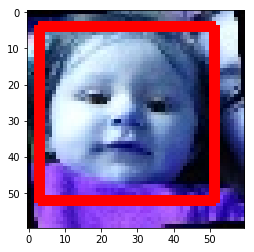

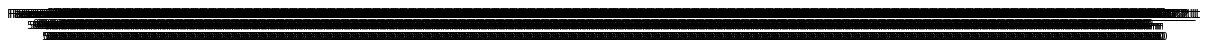

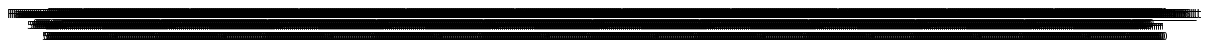

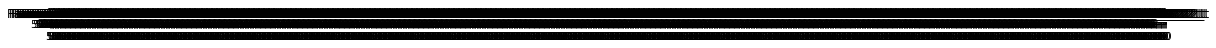

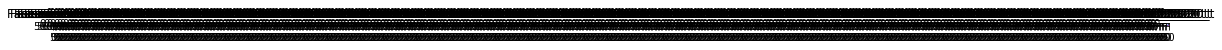

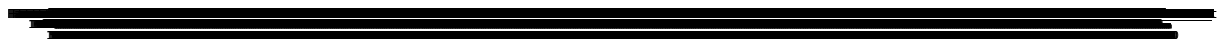

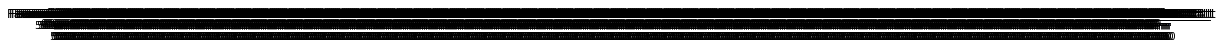

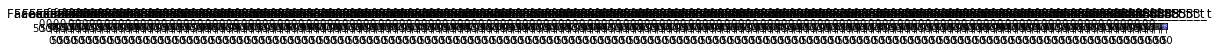

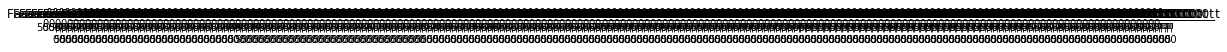

In [157]:
for label,fotos in pics.items():
    faces = processFiles(fotos)
    printMyFace(faces,label=label)

In [162]:
import face_recognition

ModuleNotFoundError: No module named 'face_recognition'